In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
from scipy.stats import binom, hypergeom, poisson, expon, norm, nbinom
import researchpy as rp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.anova import anova_lm

## 1A.
A nursing home hospital surveyed random sample of 586 votes. Responses were divided into Smoker and Non-Smoker & by Pregnant Cycle. Do the Pregnant cycle differ significantly from the smoker? Use a 0.05 level of significance.

In [114]:
df = pd.read_excel('Smoking_Pragnent.xlsx')
df.head()

,Smoking,Pragenant_Cycle
0,Smoker,1_Cycle
1,Smoker,1_Cycle
2,Smoker,1_Cycle
3,Smoker,1_Cycle
4,Smoker,1_Cycle


### Hypothesis
- Ho = There is no relationship between Smoking and the pregnant cycle
- H1 = There is a relationship between Smoking and the pregnant cycle

In [115]:
table, results = rp.crosstab(df['Smoking'], df['Pragenant_Cycle'], test = 'chi-square')
table

Pragenant_Cycle                     
Pragenant_Cycle         1_Cycle 2_Cycle 3_Cycle  All
Smoking                                             
Non_Smoker                   98     107     181  386
Smoker                       29      16      55  100
All                         127     123     236  486

In [116]:
results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,5.7826
1,p-value =,0.0555
2,Cramer's V =,0.1091


### Conclusion
- We do not reject Ho
- There is no relationship between Smoking and the pregnant cycle

# 1B.
Our counselling center on campus is concerned that most student requiring therapy do not take advantage of this service. Right now students attend only 4.6 session in a given year. Administration is considering having patient sign a contract stating that they will attend 10 session in an acedemic year

|Number of Attended therapy|
|:-------------------------|
|6|
|6|
|12|
|7|
|8|

Does signing the contract actually change the participation / attendance? Use 5% LOS

### Hypothesis
- Ho = There is no differenct between patients who signed the contract and those who didn't signed the contract
- H1 = There is a significant difference between the student who signed the contract and those who didn't

In [117]:
attendance = [6,6,12,7,8]
ttest_1samp(attendance, 4.6)

Ttest_1sampResult(statistic=2.873684832428399, pvalue=0.04530014395444604)

### Conclusion
- We reject Ho
- There is no differenct between patients who signed the contract and those who didn't signed the contract

# 1C.
A sample of drivers was chosen and their reaction times in an obstacle course were measured before and after drinking two beers. The purpose of this study was to check whether drivers are impaird after drinking two beers.

### Hypothesis
- Ho = There is no significant difference between the reaction times of the drivers before and after drinking two beers
- H1 = There is a significant difference between the reaction times of the drivers before and after drinking two beers

In [2]:
df = pd.read_csv('beers.csv')
before = df.Before
after = df.After

In [3]:
ttest_rel(after,before)

Ttest_relResult(statistic=2.5820585352876755, pvalue=0.018270781267861285)

### Conclusion
- We reject Ho
- There is a significant difference between the reaction times of the drivers before and after drinking two beers

# 1D.
Acme toy company prints baseball cards. The company claims that 30% of the cards are rookies, 60% veteran but not all steps & 10% are veteran All-stars suppose a random sample of 100 cards has 50 rookies, 45 veterans & 5 all-stars. is this consistent wth Acme's claims? use 0.05 level of significance.

### Hypothesis
- Ho = The proportion of rookies, Veterans and all stars is 30%, 60% and 10% will not have different proportion in sample
- H1 = The proportion of rookies, Veterans and all stars is 30%, 60% and 10% will have different proportion in sample

In [120]:
def expected(n,p1,p2,p3):
    e1 = n*p1
    e2 = n*p2
    e3 = n*p3
    return list([e1,e2,e3])
expected_values = expected(100,0.30,0.6,0.10)
observed_values = [50,45,5]

In [121]:
stats.chisquare(f_obs = observed_values, f_exp = expected_values)

Power_divergenceResult(statistic=19.583333333333336, pvalue=5.5915626856371765e-05)

### Conclusion
- We reject Ho
- The proportion of rookies, Veterans and all stars is 30%, 60% and 10% will have different proportion in sample

# 2A.
Do the pivot analysis conclude for total amount of bill spent by customer depending upon the Smoker and sex

In [122]:
df = sns.load_dataset('tips')
table = pd.pivot_table(data = df, index = ['sex', 'smoker'], values = ['total_bill'], aggfunc = {'total_bill':'sum'})
table

total_bill
sex    smoker            
Male   Yes        1337.07
       No         1919.75
Female Yes         593.27
       No          977.68

### Answer
- Males who smoke have a total amount of 1337.07
- Males who don't smoke have a total amount of 1919.75
- Females who don't smoke have a total amount of 593.27
- Females who don't smoke have a total amount of 977.68

# 2B.
Make a Relationship Plot and Interpretation of plot

<AxesSubplot:xlabel='sex'>

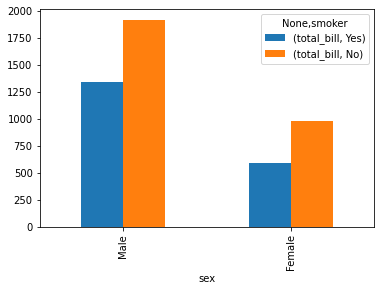

In [123]:
table = pd.pivot_table(data = df, index = ['sex'], columns = ['smoker'], values = ['total_bill'], aggfunc = {'total_bill':'sum'})
table.plot(kind = 'bar')

### Answer
- Men spend more and non-smoking men spend more than the men who smoke

# 2C.
Do the Data Visualization Identify the Outlier and Treatment of Outlier using winsorizing technique for Variable Total_Bill

<AxesSubplot:ylabel='total_bill'>

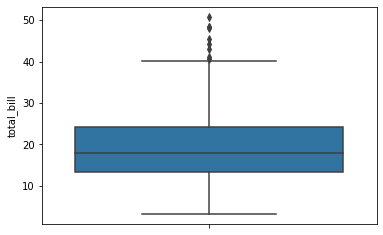

In [124]:
sns.boxplot(y = df['total_bill'])

In [125]:
q1 = df['total_bill'].quantile(0.25)
q3 = df['total_bill'].quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5 * iqr)
high = q3 + (1.5 * iqr)

In [126]:
df['total_bill'] = np.where(df['total_bill'] > high,np.median(df['total_bill']),df['total_bill'])

In [127]:
df['total_bill'] = np.where(df['total_bill'] < low,np.median(df['total_bill']),df['total_bill'])

<AxesSubplot:ylabel='total_bill'>

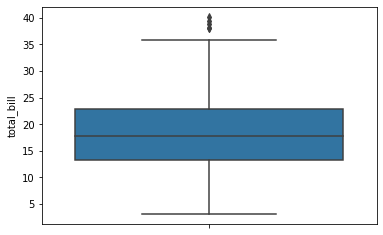

In [128]:
sns.boxplot(y = df['total_bill'])

# 2D.
A manufactures of metal pistol funds that on an average 12% of his pistols are success because they are either oversized or undersized. What is the probability that a batch of 10 pistols will contain.

In [129]:
n = 10
p = 0.12
binom.cdf(2,n,p)

0.8913182062780246

In [130]:
1 - binom.cdf(1,n,p)

0.34172496579595857

# 3A
Perform Simple Linear Regression on Salary of Employee data(Salary_Data.csv)

a. Univariate Analysis

b. Box plot

c. Missing Value

d. Correlation - Scatter  plot & Matrix & also give Interpretation

In [131]:
df = pd.read_csv('Salary_Data.csv')
df.describe()

,YearsExperience,Salary
count,30.000000,30.00000
mean,5.313333,76.00300
std,2.837888,27.41443
min,1.100000,37.73100
25%,3.200000,56.72075
50%,4.700000,65.23700
75%,7.700000,100.54475
max,10.500000,122.39100


#### Identifying outliers

<AxesSubplot:ylabel='YearsExperience'>

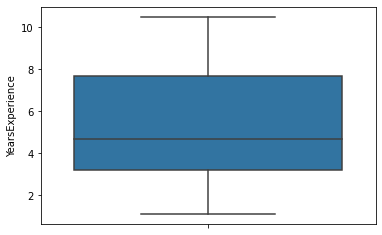

In [132]:
sns.boxplot(y = df['YearsExperience'])

<AxesSubplot:ylabel='Salary'>

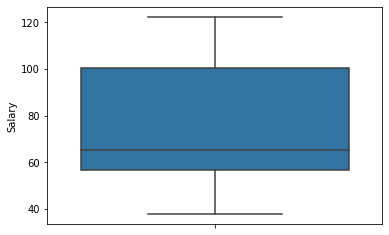

In [133]:
sns.boxplot(y = df['Salary'])

#### No outliers in either columns

#### Correlation Matrix

#### Data partition

In [134]:
x = df['YearsExperience']
y = df['Salary']
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state = 100)

In [135]:
train_data = pd.concat([x_train,y_train],axis = 1)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

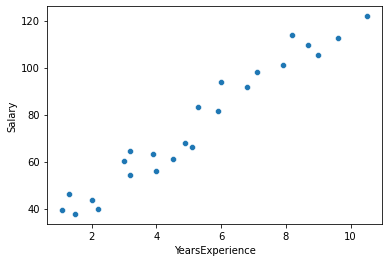

In [136]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = train_data)

In [137]:
train_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.975399
Salary,0.975399,1.000000


<AxesSubplot:>

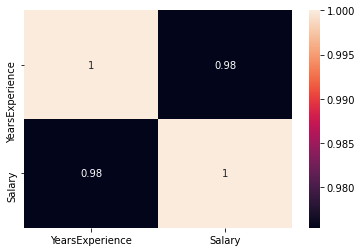

In [138]:
sns.heatmap(train_data.corr(), annot = True)

#### Model Building
Ho = There is no relationship between Years of experience and salary
H1 = There is a relationship between Years of experience and salary

In [139]:
reg = smf.ols('Salary ~ YearsExperience', data = train_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     430.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           6.14e-16
Time:                        22:26:09   Log-Likelihood:                -76.168
No. Observations:                  24   AIC:                             156.3
Df Residuals:                      22   BIC:                             158.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          26.8191      2.651     10.115      0.000      21.320      32.318
YearsExperience     9.3611      0.451     20.753      0.000       8.426      10.297
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.237
Skew:                           0.265   Prob(JB):                        0.539
Kurtosis:                       2.022   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
- We do not reject Ho
- There is a relationship between salary and years of experience

### Assumption of Model
- Linearity
- Normality
- Homoscedasicity
- Model Error has to be independently identificaly Destributed

#### Linearity

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

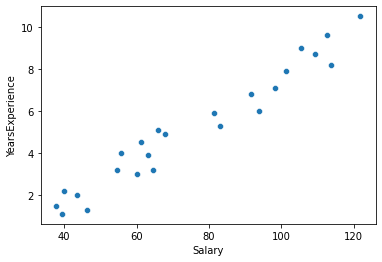

In [140]:
sns.scatterplot(x = train_data['Salary'], y = train_data['YearsExperience'])

In [141]:
train_data['Fitted_value'] = reg.fittedvalues
train_data['residual'] = reg.resid
train_data.head()

,YearsExperience,Salary,Fitted_value,residual
27,9.6,112.635,116.685782,-4.050782
25,9.0,105.582,111.069113,-5.487113
6,3.0,60.150,54.902414,5.247586
17,5.3,83.088,76.432982,6.655018
22,7.9,101.302,100.771885,0.530115


In [142]:
y = 26.8191 + 9.3611*9.6
y

116.68566000000001

#### Homoscedasicity

<AxesSubplot:xlabel='Fitted_value', ylabel='residual'>

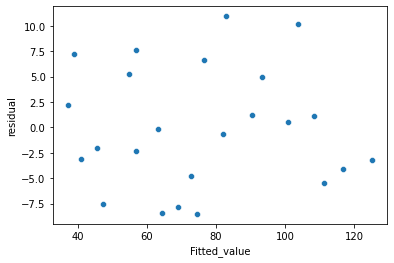

In [143]:
sns.scatterplot(x = train_data['Fitted_value'],y = train_data['residual'])

#### Normality

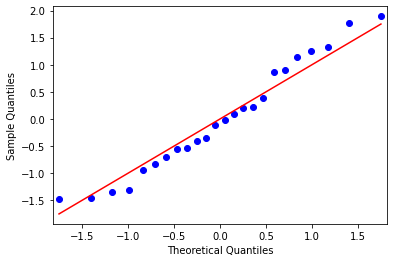

In [144]:
sm.qqplot(train_data['residual'], fit = True, line = 's')
plt.show()

#### Model Error are IID

/home/eshaanjoshi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual', ylabel='Density'>

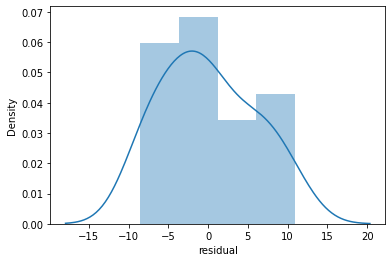

In [145]:
sns.distplot(train_data.residual)

### Prediction on test data

In [146]:
reg.summary(0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     430.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           6.14e-16
Time:                        22:26:10   Log-Likelihood:                -76.168
No. Observations:                  24   AIC:                             156.3
Df Residuals:                      22   BIC:                             158.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          26.8191      2.651     10.115      0.000      21.320      32.318
YearsExperience     9.3611      0.451     20.753      0.000       8.426      10.297
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.237
Skew:                           0.265   Prob(JB):                        0.539
Kurtosis:                       2.022   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
test_data = pd.concat([x_test,y_test],axis = 1)
test_data.head()

,YearsExperience,Salary
9,3.7,57.189
26,9.5,116.969
28,10.3,122.391
13,4.1,57.081
5,2.9,56.642


In [148]:
test_data['Predicted'] = reg.predict(test_data)
test_data.head()

,YearsExperience,Salary,Predicted
9,3.7,57.189,61.455196
26,9.5,116.969,115.749671
28,10.3,122.391,123.238564
13,4.1,57.081,65.199642
5,2.9,56.642,53.966303


#### MSE and MAE and RMSE for evalueation of Model on train data

In [149]:
import math
model_mse = mean_squared_error(train_data['Salary'],train_data['Fitted_value'])
model_rmse = math.sqrt(model_mse)
print('RMSE {:.3}'.format(model_rmse))

RMSE 5.78


In [150]:
model_mse = mean_squared_error(test_data['Salary'],test_data['Predicted'])
model_rmse = math.sqrt(model_mse)
print('RMSE {:.3}'.format(model_rmse))

RMSE 4.95


# 3B
Build a model of Multiple Linear Regression on sales of phone (Advertising.csv)

a. State the Hypothesis

b. Write the equation of model and give interpretation

c. Accuracy of Model and give interpretation

d. Prediction if the Tv = 110.7 and radio = 40.6, how much will be the sales

In [151]:
df = pd.read_csv('Advertising.csv')

#### Identifying and Treatment of Outlier

<AxesSubplot:>

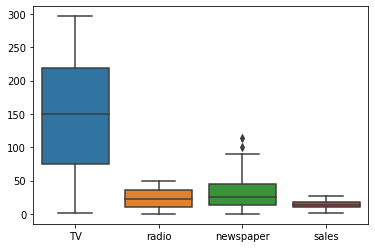

In [152]:
sns.boxplot(data = df)

In [153]:
q1 = df['newspaper'].quantile(0.25)
q3 = df['newspaper'].quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5*iqr)
high = q3 + (1.5*iqr)

In [154]:
df['newspaper'] = np.where(df['newspaper'] > high, np.median(df['newspaper']), df['newspaper'])

<AxesSubplot:>

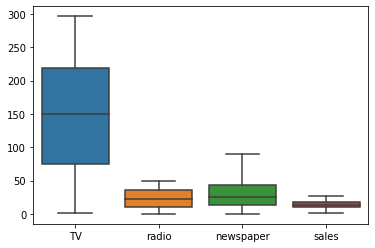

In [155]:
sns.boxplot(data = df)

In [156]:
x = df.drop('sales',axis = 1)
y = df['sales']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 100)

In [157]:
train_data = pd.concat([y_train,x_train],axis = 1)
train_data.head()

,sales,TV,radio,newspaper
168,17.1,215.4,23.6,57.6
112,14.1,175.7,15.4,2.4
171,14.5,164.5,20.9,47.4
181,12.2,218.5,5.4,27.4
7,13.2,120.2,19.6,11.6


#### correlation matrix

In [158]:
train_data.corr()

,sales,TV,radio,newspaper
sales,1.000000,0.787246,0.533795,0.254206
TV,0.787246,1.000000,0.016024,0.058933
radio,0.533795,0.016024,1.000000,0.385720
newspaper,0.254206,0.058933,0.385720,1.000000


<AxesSubplot:>

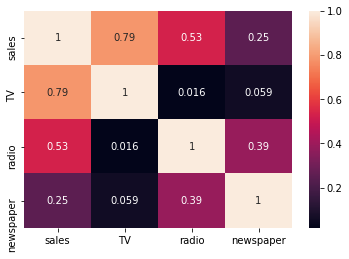

In [159]:
sns.heatmap(train_data.corr(),annot = True)

<AxesSubplot:title={'center':'sales vs TV'}, xlabel='TV', ylabel='sales'>

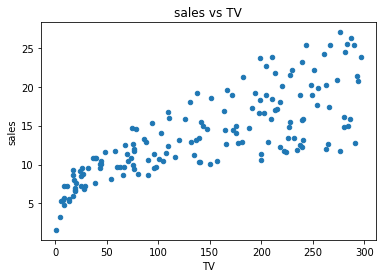

In [160]:
train_data.plot.scatter(x = 'TV', y = 'sales', title = 'sales vs TV')

#### Multicollinearity (with help of VIF)

In [161]:
x1 = train_data.drop('sales',axis = 1)
series_before = pd.Series([variance_inflation_factor(x1.values, i)
                           for i in range(x1.shape[1])], 
                          index = x1.columns)
series_before

TV           2.328383
radio        3.331315
newspaper    3.354515
dtype: float64

- no multi-collinearity in the data

### Model Building
- Ho = There is no Linear Relationship between sales and tv, radio and newspaper
- H1 = There is a Linear Relationship between sales and tv, radio and newspaper

In [162]:
reg = smf.ols('sales ~ TV + radio + newspaper',data = train_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     427.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           5.42e-75
Time:                        22:26:13   Log-Likelihood:                -316.75
No. Observations:                 160   AIC:                             641.5
Df Residuals:                     156   BIC:                             653.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8159      0.362      7.774      0.000       2.100       3.531
TV             0.0456      0.002     29.467      0.000       0.043       0.049
radio          0.1859      0.010     18.124      0.000       0.166       0.206
newspaper      0.0022      0.007      0.297      0.767      -0.012       0.017
==============================================================================
Omnibus:                       43.924   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.803
Skew:                          -1.224   Prob(JB):                     1.16e-20
Kurtosis:                       5.789   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- There is Linear relationship between sales and tv and radio
- There is no Linear relationship between sales and Newspaper
- so we will remove and re-run the model
- 89.2% is the accuracy of the model

In [163]:
reg2 = smf.ols('sales ~TV + radio',data = train_data).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     644.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.97e-76
Time:                        22:26:14   Log-Likelihood:                -316.80
No. Observations:                 160   AIC:                             639.6
Df Residuals:                     157   BIC:                             648.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8521      0.340      8.388      0.000       2.181       3.524
TV             0.0456      0.002     29.619      0.000       0.043       0.049
radio          0.1870      0.009     19.824      0.000       0.168       0.206
==============================================================================
Omnibus:                       44.519   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.044
Skew:                          -1.229   Prob(JB):                     2.30e-21
Kurtosis:                       5.865   Cond. No.                         419.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Equation of Model
- y = Intercept + TV(coef) * value + radio(coef) * value
#### Accuracy of the Model
- The accuracy of the model is 89.1%

### Multicollinearity

In [164]:
x1 = train_data.loc[:,['TV','radio']]
series_before = pd.Series([variance_inflation_factor(x1.values, 
                                                     i) for i in range(x1.shape[1])],
                          index = x1.columns)
series_before

TV       2.066257
radio    2.066257
dtype: float64

### Assumption of Model
- Linearity
- Normality
- Homoscedasicity
- Model error has to be independently identificaly distributed

In [165]:
y = 2.8521 + 0.0456 * 241.7 + 0.1870 * 38
y

20.97962

In [166]:
train_data['fitted_value'] = reg2.fittedvalues
train_data['residual'] = reg2.resid
train_data.head()

,sales,TV,radio,newspaper,fitted_value,residual
168,17.1,215.4,23.6,57.6,17.092661,0.007339
112,14.1,175.7,15.4,2.4,13.747894,0.352106
171,14.5,164.5,20.9,47.4,14.265602,0.234398
181,12.2,218.5,5.4,27.4,13.830165,-1.630165
7,13.2,120.2,19.6,11.6,12.001478,1.198522


#### Linearity

<AxesSubplot:title={'center':'sales vs TV'}, xlabel='TV', ylabel='sales'>

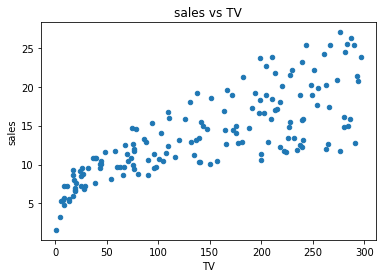

In [167]:
train_data.plot.scatter(x = 'TV', y = 'sales', title = 'sales vs TV')

#### Homoscedasicity

Text(0.5, 1.0, 'Residuals vs fitted plot for homoscedasicity check')

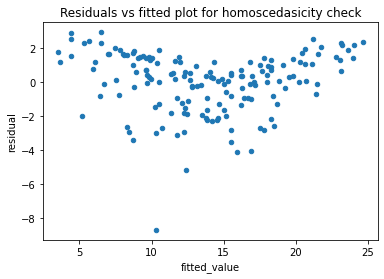

In [168]:
train_data.plot.scatter(x = 'fitted_value',y = 'residual')
plt.xlabel
plt.ylabel
plt.title('Residuals vs fitted plot for homoscedasicity check')

#### Normality

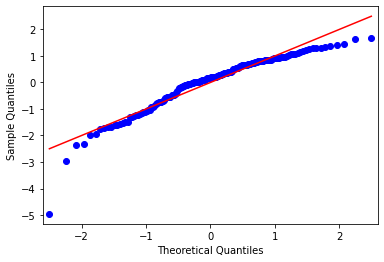

In [169]:
sm.qqplot(train_data['residual'], fit = True, line = 's')
plt.show()

#### Model Error are IID

/home/eshaanjoshi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual', ylabel='Density'>

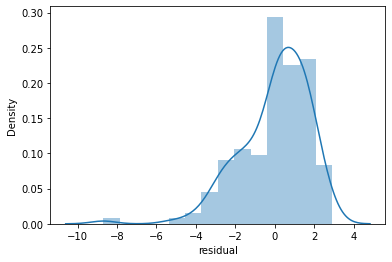

In [170]:
sns.distplot(train_data.residual)

### Prediction on test data

In [171]:
test_data = pd.concat([x_test,y_test],axis = 1)
test_data.head()

,TV,radio,newspaper,sales
126,7.8,38.9,50.6,6.6
104,238.2,34.3,5.3,20.7
99,135.2,41.7,45.9,17.2
92,217.7,33.5,59.0,19.4
111,241.7,38.0,23.2,21.8


In [172]:
test_data['prediction'] = reg2.predict(test_data)
test_data.head()

,TV,radio,newspaper,sales,prediction
126,7.8,38.9,50.6,6.6,10.483388
104,238.2,34.3,5.3,20.7,20.134013
99,135.2,41.7,45.9,17.2,16.819116
92,217.7,33.5,59.0,19.4,19.049170
111,241.7,38.0,23.2,21.8,20.985690


In [173]:
y = 2.8521 + 0.0456 * 7.8 + 0.1870 * 38.9
y

10.48208

In [174]:
model_mse = mean_squared_error(train_data['sales'],train_data['fitted_value'])
model_rmse = math.sqrt(model_mse)
print('RMSE {:.3}'.format(model_rmse))

RMSE 1.75


In [175]:
model_mse = mean_squared_error(train_data['sales'],train_data['fitted_value'])
model_rmse = math.sqrt(model_mse)
print('RMSE {:.3}'.format(model_rmse))

RMSE 1.75


### MSE and MAE and RMSE for evaluation of Model on test data

In [176]:
model_mse = mean_squared_error(test_data['sales'],test_data['prediction'])
model_rmse = math.sqrt(model_mse)
print('RMSE {:.3}'.format(model_rmse))

RMSE 1.3


In [177]:
y = 2.8521 + 0.0456 * 110.7 + 0.1870 * 40.6
print('The sales if TV = 110.7 and radio = 40.6 is {}'.format(y))

The sales if TV = 110.7 and radio = 40.6 is 15.49222


# 4A
Build a model of Simple Linear regression on Volcano data

a. State the Hypothesis

b. Write the equation of model and give interpretation

c. Accuracy of Model and give interpretation

d. Prediction if the waiting time is 80 minutes

In [178]:
df = pd.read_csv('Volcano.csv')

In [179]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


### Identify and Treament of Outlier

<AxesSubplot:ylabel='waiting'>

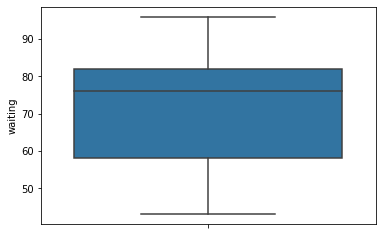

In [180]:
sns.boxplot( y = df['waiting'])

<AxesSubplot:ylabel='eruptions'>

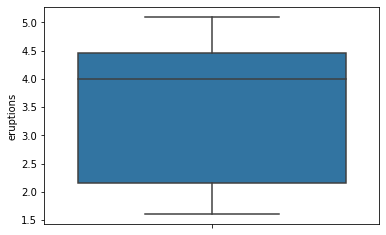

In [181]:
sns.boxplot(y = df['eruptions'])

#### Data partition

In [182]:
x = df['waiting']
y = df['eruptions']
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 100)
train_data = pd.concat([x_train,y_train],axis = 1)

#### Correaltion Matrix

<AxesSubplot:title={'center':'volcano'}, xlabel='waiting', ylabel='eruptions'>

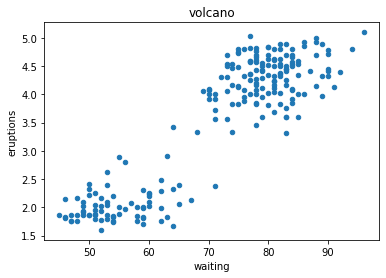

In [183]:
train_data.plot.scatter(x = 'waiting', y = 'eruptions', title = 'volcano')

In [184]:
train_data.corr()

,waiting,eruptions
waiting,1.000000,0.900857
eruptions,0.900857,1.000000


<AxesSubplot:>

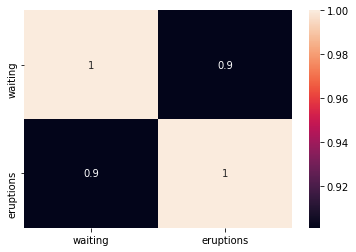

In [185]:
sns.heatmap(train_data.corr(), annot = True)

### Hypothesis
- Ho = There is no relationship between the waiting and eruptions
- H1 = There is a relationship between the waiting and eruptions

In [186]:
reg = smf.ols('eruptions ~ waiting',data = train_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     925.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           7.33e-80
Time:                        22:26:19   Log-Likelihood:                -154.92
No. Observations:                 217   AIC:                             313.8
Df Residuals:                     215   BIC:                             320.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9783      0.184    -10.731      0.000      -2.342      -1.615
waiting        0.0772      0.003     30.428      0.000       0.072       0.082
==============================================================================
Omnibus:                        5.136   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.099
Skew:                          -0.230   Prob(JB):                        0.129
Kurtosis:                       2.509   Cond. No.                         397.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
- We reject Ho
- There is a relationship between waiting and eruptions

### Assumptions of Model
- Linearity
- Normality
- Homoscedasicity
- Model error has to be independently Distributed

b.

y = -1.9783 + 0.0772 * value

c.

Accuracy of the model is 81.2%

#### Linearity

<AxesSubplot:title={'center':'Volcano'}, xlabel='waiting', ylabel='eruptions'>

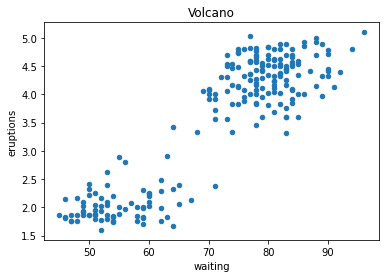

In [187]:
train_data.plot.scatter(x = 'waiting', y = 'eruptions', title = 'Volcano')

In [188]:
train_data['fitted_value'] = reg.fittedvalues
train_data['residual'] = reg.resid
train_data.head()

,waiting,eruptions,fitted_value,residual
111,59,2.300,2.578957,-0.278957
190,81,4.800,4.278259,0.521741
29,79,4.433,4.123777,0.309223
99,82,4.900,4.355500,0.544500
207,84,3.850,4.509982,-0.659982


#### Homoscedasicity

Text(0.5, 1.0, 'homoscedasicity check')

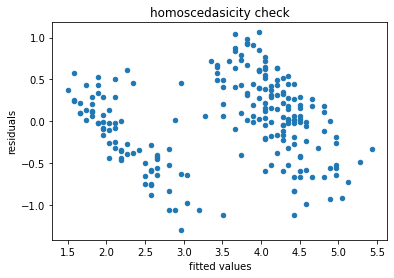

In [189]:
train_data.plot.scatter(x = 'fitted_value', y = 'residual')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('homoscedasicity check')

#### Normality

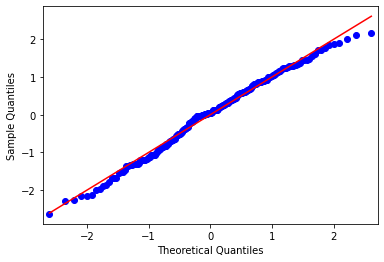

In [190]:
sm.qqplot(train_data['residual'],fit = True, line = 's')
plt.show()

#### Model error are IID

/home/eshaanjoshi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual', ylabel='Density'>

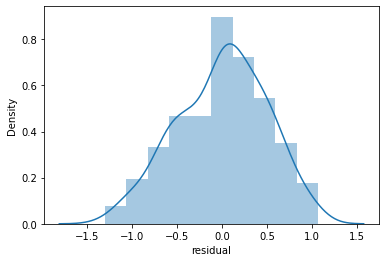

In [191]:
sns.distplot(train_data.residual)

In [192]:
test_data = pd.concat([x_test,y_test],axis = 1)

In [193]:
test_data['predicted'] = reg.predict(test_data)
test_data.head()

,waiting,eruptions,predicted
59,81,4.317,4.278259
139,79,3.733,4.123777
219,76,4.150,3.892054
134,46,1.833,1.574824
189,55,2.183,2.269993


### MSE and MAE and RMSE for evaluation of Model on train data

In [194]:
model_mse = mean_squared_error(train_data['eruptions'], train_data['fitted_value'])
model_rmse = math.sqrt(model_mse)
print('RMSE {:.3}'.format(model_rmse))

RMSE 0.494


### MSE and MAE and RMSE for evaluation of Model on test data

In [195]:
model_mse = mean_squared_error(test_data['eruptions'], test_data['predicted'])
model_rmse = math.sqrt(model_mse)
print('RMSE {:.3}'.format(model_rmse))

RMSE 0.5


### Prediction if the waiting time is 80 minutes

In [196]:
y = -1.9783 + 0.0772 * 80
print('The eruption time if waiting time is 80 minutes is {}'.format(y))

The eruption time if waiting time is 80 minutes is 4.1977


# 4B.
Perform Multiple Linear regression on mileage of car

a. Box plot and Missing value

b. Treatment of Outlier using Winsorizing technique

c. Correlation - Scatter plot and Matrix and also give interpretation

d. Check Multi-collinearity using VIF and also give interpretation

In [3]:
df = pd.read_csv('mtcars.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   wt      32 non-null     float64
 2   qsec    32 non-null     float64
 3   am      32 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


### Indetifying and Treament of Outliers

<AxesSubplot:ylabel='mpg'>

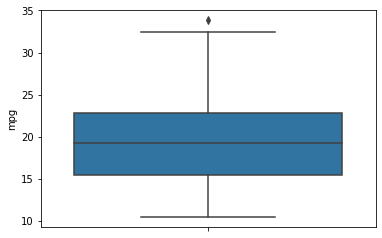

In [5]:
sns.boxplot(y = df['mpg'])

<AxesSubplot:ylabel='wt'>

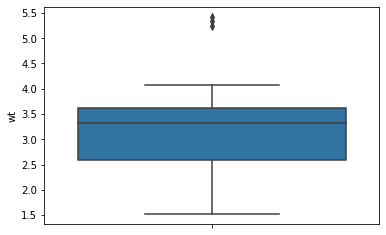

In [6]:
sns.boxplot(y = df['wt'])

<AxesSubplot:ylabel='qsec'>

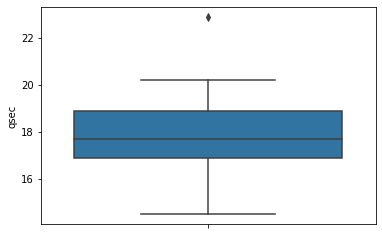

In [7]:
sns.boxplot(y = df['qsec'])

<AxesSubplot:ylabel='am'>

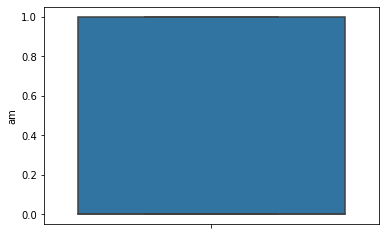

In [8]:
sns.boxplot(y = df['am'])

In [9]:
q1_mpg = df['mpg'].quantile(0.25)
q3_mpg = df['mpg'].quantile(0.75)
iqr_mpg = q3_mpg - q1_mpg
low_mpg = q1_mpg - 1.5 * iqr_mpg
high_mpg = q3_mpg + 1.5 * iqr_mpg

In [11]:
q1_qsec = df['qsec'].quantile(0.25)
q3_qsec = df['qsec'].quantile(0.75)
iqr_qsec = q3_qsec - q1_qsec
low_qsec = q1_qsec - 1.5 * iqr_qsec
high_qsec = q3_qsec + 1.5 * iqr_qsec

In [12]:
q1_wt = df['wt'].quantile(0.25)
q3_wt = df['wt'].quantile(0.75)
iqr_wt = q3_wt - q1_wt
low_wt = q1_wt - 1.5 * iqr_wt
high_wt = q3_wt + 1.5 * iqr_wt

In [13]:
df['mpg'] = np.where(df['mpg'] > high_mpg,high_mpg,df['mpg'])
df['qsec'] = np.where(df['qsec'] > high_qsec, np.median(df['qsec']),df['qsec'])
df['wt'] = np.where(df['wt'] > high_wt, np.median(df['wt']),df['wt'])

<AxesSubplot:ylabel='mpg'>

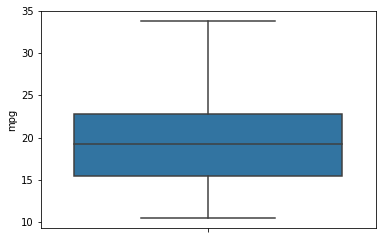

In [14]:
sns.boxplot(y = df['mpg'])

<AxesSubplot:ylabel='qsec'>

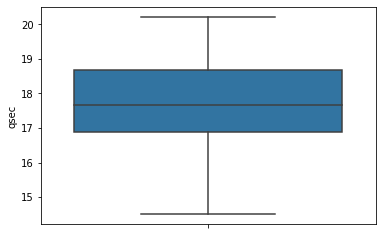

In [16]:
sns.boxplot(y = df['qsec'])

<AxesSubplot:ylabel='wt'>

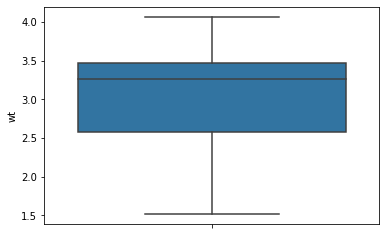

In [17]:
sns.boxplot(y = df['wt'])

### Splitting the data in training and test set

In [19]:
x = df.drop(['mpg'],axis = 1)
y = df['mpg']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 100)
train_data = pd.concat([y_train,x_train],axis = 1)
train_data.head()

,mpg,wt,qsec,am
17,32.4,2.20,19.47,1
6,14.3,3.57,15.84,0
9,19.2,3.44,18.30,0
0,21.0,2.62,16.46,1
30,15.0,3.57,14.60,1


### Correlation Matrix

In [20]:
train_data.corr()

,mpg,wt,qsec,am
mpg,1.000000,-0.810387,0.545194,0.634104
wt,-0.810387,1.000000,-0.462738,-0.751726
qsec,0.545194,-0.462738,1.000000,0.053903
am,0.634104,-0.751726,0.053903,1.000000


<AxesSubplot:>

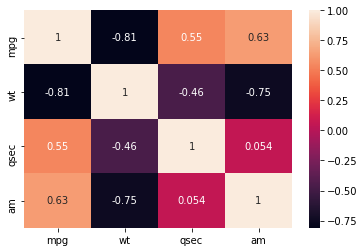

In [21]:
sns.heatmap(train_data.corr(),annot = True)

- Mileage has negative 81% correlation with the weight of the car
- Mileage has positive 54.5% correlation with the mile time
- Mileage has positive 63.4% correlation with the type of transmission

<AxesSubplot:title={'center':'mpg vs wt'}, xlabel='wt', ylabel='mpg'>

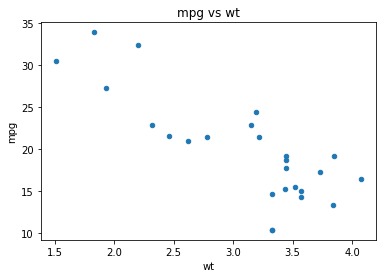

In [22]:
train_data.plot.scatter(x = 'wt',y = 'mpg', title = 'mpg vs wt')

- Multi-collinearity exists, qsec has the highest collinearity. Hence we remove qsec and re run the model

In [24]:
x1 = train_data.drop(['qsec'],axis = 1)
series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
                           ,index = x1.columns)
series_before

mpg    10.691211
wt      6.723626
am      2.862963
dtype: float64

- Multi-collinearity exists, mpg has the highest collinearity. Hence we remove mpg and re run the model

In [27]:
x1 = train_data.drop(['mpg','qsec'],axis = 1)
series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
                           ,index = x1.columns)
series_before

wt    1.214864
am    1.214864
dtype: float64

### Model Building
- Ho = There is no Linear Relationship between weight and type of transmission
- H1 = There is a Linear Relationship between weight and type of transmission

In [28]:
reg = smf.ols('wt ~ am',data = train_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wt   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     29.88
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           1.48e-05
Time:                        00:35:58   Log-Likelihood:                -15.159
No. Observations:                  25   AIC:                             34.32
Df Residuals:                      23   BIC:                             36.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4309      0.112     30.579      0.000       3.199       3.663
am            -1.0843      0.198     -5.467      0.000      -1.495      -0.674
==============================================================================
Omnibus:                        3.117   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                1.612
Skew:                           0.287   Prob(JB):                        0.447
Kurtosis:                       4.104   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""